In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [9]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

### Building Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
!pip install six

In [18]:
Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

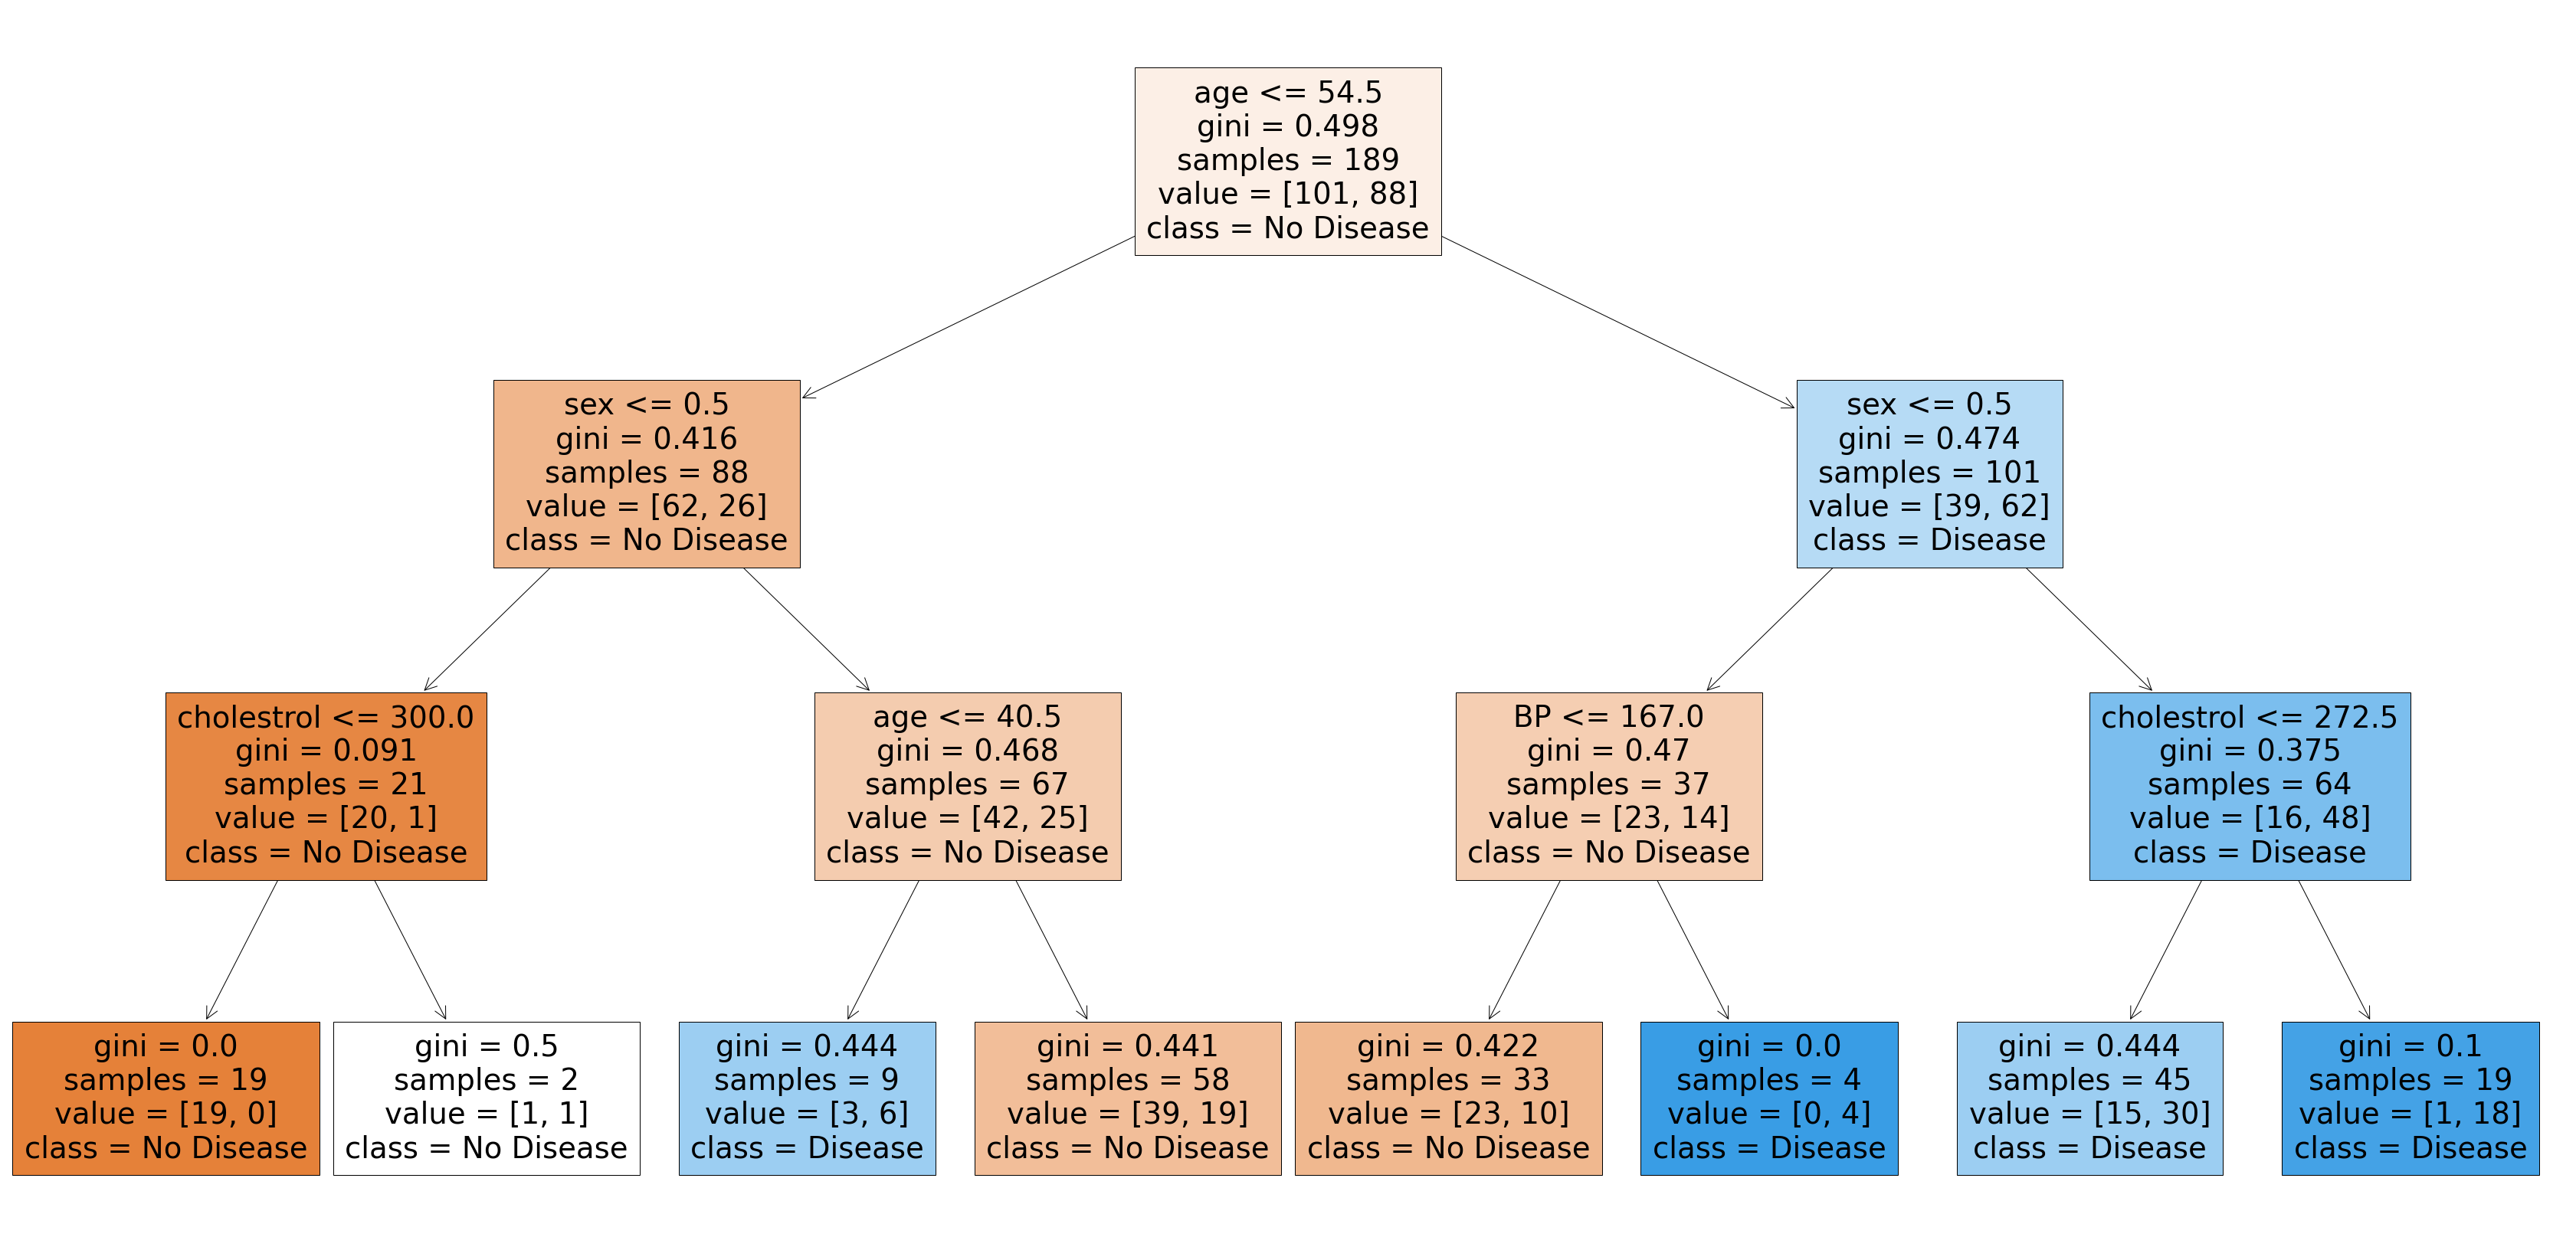

  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-py3-none-any.whl size=52495 sha256=4bf72151cea751a4a47d4758d364ebe941645aadfd86063be35e51cebbf32154
  Stored in directory: c:\users\91975\appdata\local\pip\cache\wheels\f9\a4\31\ab1a600f601467c4551c288c34c41beaf8d06fe9d6b8a818f9
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612248 sha256=74f54b1ce5ed794ebf0ed1e684a0ddc7a501f82da9ea8477c65ade9ef52baae9
  Stored in directory: c:\users\91975\appdata\local\pip\cache\wheels\ea\21\84\970b03913d0d6a96ef51c34c878add0de9e4ecbb7c764ea21f
Successfully built dtreeviz pyspark


In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [17]:
#!pip install dtreeviz
#from dtreeviz.trees import dtreeviz # remember to load the package
#viz = dtreeviz(dt, X, y,
#target_name="target",
#feature_names=X.columns,
#class_names=['No Disease', "Disease"])
#viz



In [19]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

NameError: name 'pydotplus' is not defined

#### Evaluating model performance

In [20]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [23]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)